# PEW Research Suvery AI Accpetance Decision Tree

CAS 570 - Fundamentals of Complex Adaptive Systems Science

**William Tolson**, December 2023

This notebook uses scikit-learn 1.3.2 to train a decision tree on data conveying survey opinions about advanced technologies to begin an investigation into the socio-technological complex adaptive systems behind public acceptance of AI technologies.  
Term computational project for CAS 570, *Fundamentals of Complex Adaptive Systems science* for FallC 2023. Adapted in part from "Training of a Decision Tree with Scikit-Learn" by Dr. Enrico Borriello.

Recommended environment is JupyterLab: https://jupyter.org/ 

## Libraries

Import the libraries and functions for the Decision Tree portion of the project.

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Decision Tree Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

#Cross-validation and a test data set generation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Plotting
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
%matplotlib inline

## Dataset

PEW RESEARCH CENTER  
Wave 99 American Trends Panel  
Dates: Nov. 1-Nov. 7, 2021    
Sample: Full panel  
N=10,260  
https://www.pewresearch.org/internet/dataset/american-trends-panel-wave-99/

**For this portion of the project, the dataset is narrowed to the following 14 AI-related questions posed to all participants.**

CNCEXC.  
Overall, would you say the increased use of artificial intelligence computer programs in daily life makes you feel…

ALGFAIR.  
Do you think it is possible or not possible for people to design artificial intelligence computer programs that can consistently make fair decisions in complex situations?

Thinking about the people who design artificial intelligence computer programs, how well do you think they take into account the experiences and views of each of the following?

DISCRIM1_a. White adults  
DISCRIM1_b. Black adults  
DISCRIM1_c. Hispanic adults  
DISCRIM1_d. Asian adults  
DISCRIM1_e. Men  
DISCRIM1_f. Women  

How excited or concerned would you be if artificial intelligence computer programs could do each of the following?

POSNEGAI_a. Know people’s thoughts and behaviors  
POSNEGAI_b. Perform household chores  
POSNEGAI_c. Make important life decisions for people  
POSNEGAI_d. Diagnose medical problems  
POSNEGAI_e. Perform repetitive workplace tasks  
POSNEGAI_f. Handle customer service calls  

**These variables are selected to indicate overall acceptance of AI, belief about AI reliability, social (discrimination) concerns with AI, and concerns about specific AI applications.**

Note: These variables also have a high probability of being surveyed by Pew again in the future, which would provide a significant increase in the insight to be gained from them.

In [2]:
df = pd.read_csv('ATP_W99_AI.csv')
df

,CNCEXC,ALGFAIR,DISCRIM1_a,DISCRIM1_b,DISCRIM1_c,DISCRIM1_d,DISCRIM1_e,DISCRIM1_f,POSNEGAI_a,POSNEGAI_b,POSNEGAI_c,POSNEGAI_d,POSNEGAI_e,POSNEGAI_f
0,3,2,3,1,1,1,5,5,5,3,5,3,4,4
1,1,1,1,3,3,5,2,1,3,3,3,3,2,3
2,3,2,2,2,2,2,1,2,4,1,4,3,2,5
3,3,2,5,5,5,5,5,5,5,2,5,3,2,3
4,3,3,5,5,5,5,1,5,5,1,5,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,2,2,5,5,5,5,5,5,5,1,5,5,5,5
10256,3,1,5,5,5,5,2,3,5,2,3,1,4,2
10257,2,1,1,1,1,1,4,1,1,1,1,1,1,1
10258,1,1,1,1,1,1,1,1,3,1,3,1,2,2


## Data preprocessing

**The survey data was preprocessed for concise visualization with scikit-learn's decision tree functionality.**  
https://scikit-learn.org/stable/modules/tree.html#decision-trees

For use with further models, or a decision tree that portrays a predicted level of acceptance in lieu of a predicted textual survey response, the values for 'ACCEPT' would instead be replaced with ordinal values.

In [3]:
df0 = df.copy # store a copy of the initial dataframe before editing

Convert the dependant variable to state-descriptive terms

In [4]:
# Replace CNCEX accpetance answers with labels
    # Excited = 'Excited'
    # Equal = 'Equal'
    # Concerned = 'Cncrnd'
    # No Answer = 'NA'
#Labels can be quantified later for other forms of analysis

replacement_values = {1: 'Excited', 2: 'Cncrnd', 3: 'Equal', 99: 'NA'}

df['CNCEXC'] = df['CNCEXC'].replace(replacement_values)

# list classes:
class_list = df['CNCEXC'].unique()
class_list

array(['Equal', 'Excited', 'Cncrnd', 'NA'], dtype=object)

Convert independant variables to comperable scales.

In [5]:
# Adjust variables to a consistant 0-100 scale, from concerned to excited about AI in everday life

# ALGFAIR: Is it possible to design AI that is fair?

replacement_values = {1: 100, 2: 0, 3: 50, 99: 50}
df['ALGFAIR'] = df['ALGFAIR'].replace(replacement_values)

# DISCRIM1: How well will AI designers account for the concerns of differing demographic groups?

# Estimated concern about descrimination for those who were Equal or did not answer
Discrim_NA = 75 # Few occurances = negligeable influence on outcome

replacement_values = {1: 100, 2: 66, 3: 33, 4: 0, 5: Discrim_NA, 99: Discrim_NA} 
columns_to_replace = ['DISCRIM1_a', 'DISCRIM1_b', 'DISCRIM1_c', 'DISCRIM1_d', 'DISCRIM1_e', 'DISCRIM1_f']

for column in columns_to_replace:
    df[column] = df[column].replace(replacement_values)

# POSNEGAI: How excited or concerned are you about specific AI tech?

replacement_values = {1: 100, 2: 75, 3: 50, 4: 25, 5: 0, 99: 75}
columns_to_replace = ['POSNEGAI_a', 'POSNEGAI_b', 'POSNEGAI_c', 'POSNEGAI_d', 'POSNEGAI_e', 'POSNEGAI_f']

for column in columns_to_replace:
    df[column] = df[column].replace(replacement_values)

Rename feature names for readability.

In [6]:
# Directly rename column headers with new feature names

df.rename(columns={
    # Overall, would you say the increased use of artificial intelligence computer programs in daily life makes you feel…
    'CNCEXC': 'ACCEPT',
    # Do you think it is possible or not possible for people to design artificial intelligence computer programs that can consistently make fair decisions in complex situations?
    'ALGFAIR': 'Fair_AI',
    # Thinking about the people who design artificial intelligence computer programs, how well do you think they take into account the experiences and views of each of the following?
    'DISCRIM1_a': 'White',
    'DISCRIM1_b': 'Black',
    'DISCRIM1_c': 'Hispnc',
    'DISCRIM1_d': 'Asian',
    'DISCRIM1_e': 'Men',
    'DISCRIM1_f': 'Women',
    # How excited or concerned would you be if artificial intelligence computer programs could do each of the following?
    'POSNEGAI_a': 'Know_thots', # Know people’s thoughts and behaviors
    'POSNEGAI_b': 'House_chore', # Perform household chores
    'POSNEGAI_c': 'Life_decider', # Make important life decisions for people
    'POSNEGAI_d': 'Med_diag', # Diagnose medical problems
    'POSNEGAI_e': 'Work_task', # Perform repetitive workplace tasks
    'POSNEGAI_f': 'Serv_call', # Handle customer service calls
}, inplace=True)

df

,ACCEPT,Fair_AI,White,Black,Hispnc,Asian,Men,Women,Know_thots,House_chore,Life_decider,Med_diag,Work_task,Serv_call
0,Equal,0,33,100,100,100,75,75,0,50,0,50,25,25
1,Excited,100,100,33,33,75,66,100,50,50,50,50,75,50
2,Equal,0,66,66,66,66,100,66,25,100,25,50,75,0
3,Equal,0,75,75,75,75,75,75,0,75,0,50,75,50
4,Equal,50,75,75,75,75,100,75,0,100,0,0,75,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,Cncrnd,0,75,75,75,75,75,75,0,100,0,0,0,0
10256,Equal,100,75,75,75,75,66,33,0,75,50,100,25,75
10257,Cncrnd,100,100,100,100,100,0,100,100,100,100,100,100,100
10258,Excited,100,100,100,100,100,100,100,50,100,50,100,75,75


Define labels and features.

In [7]:
#Define labels and features
features = df.columns[1:14]
labels = ['Cncrnd', 'Equal', 'Excited', 'NA'] #Explicitly assigned to ensure matching order

#Print labels and features
print('features = '+str(list(features)), "\n")
print('labels = '+str(list(labels)), "\n")

# Print occurances of each acceptance option
value_counts = df['ACCEPT'].value_counts()
print(value_counts)

features = ['Fair_AI', 'White', 'Black', 'Hispnc', 'Asian', 'Men', 'Women', 'Know_thots', 'House_chore', 'Life_decider', 'Med_diag', 'Work_task', 'Serv_call'] 

labels = ['Cncrnd', 'Equal', 'Excited', 'NA'] 

Equal      4597
Cncrnd     3773
Excited    1853
NA           37
Name: ACCEPT, dtype: int64


## Training

Train a decision tree and generate a set of data for testing it.

In [8]:
# Set feature matrix X and target vector y
X = np.array(df[['Fair_AI', 'White', 'Black', 'Hispnc', 'Asian', 'Men', 'Women', 'Know_thots', 'House_chore', 'Life_decider', 'Med_diag', 'Work_task', 'Serv_call']])
y = np.array(df[['ACCEPT']])

# Split the data - 90% for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [9]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

## Visualization

**Distribuition of Acceptance**  
Visualized for situational awareness while considering the results of decision tree training.

<Axes: >

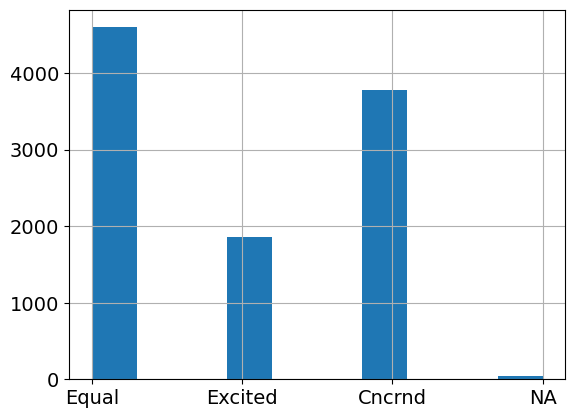

In [10]:
#level of acceptance in dataset
df.ACCEPT.hist()

**Decision Tree Box Diagram**  
This visualization was the primary objective of this notebook because it provides a means of qualititive consideration for which paths may be most fruitful to examine further for complex adaptive traits at work.

The logical flow of this decision tree visualization can be understood as **IF (logical test) THEN (left leg) ELSE (right leg).**

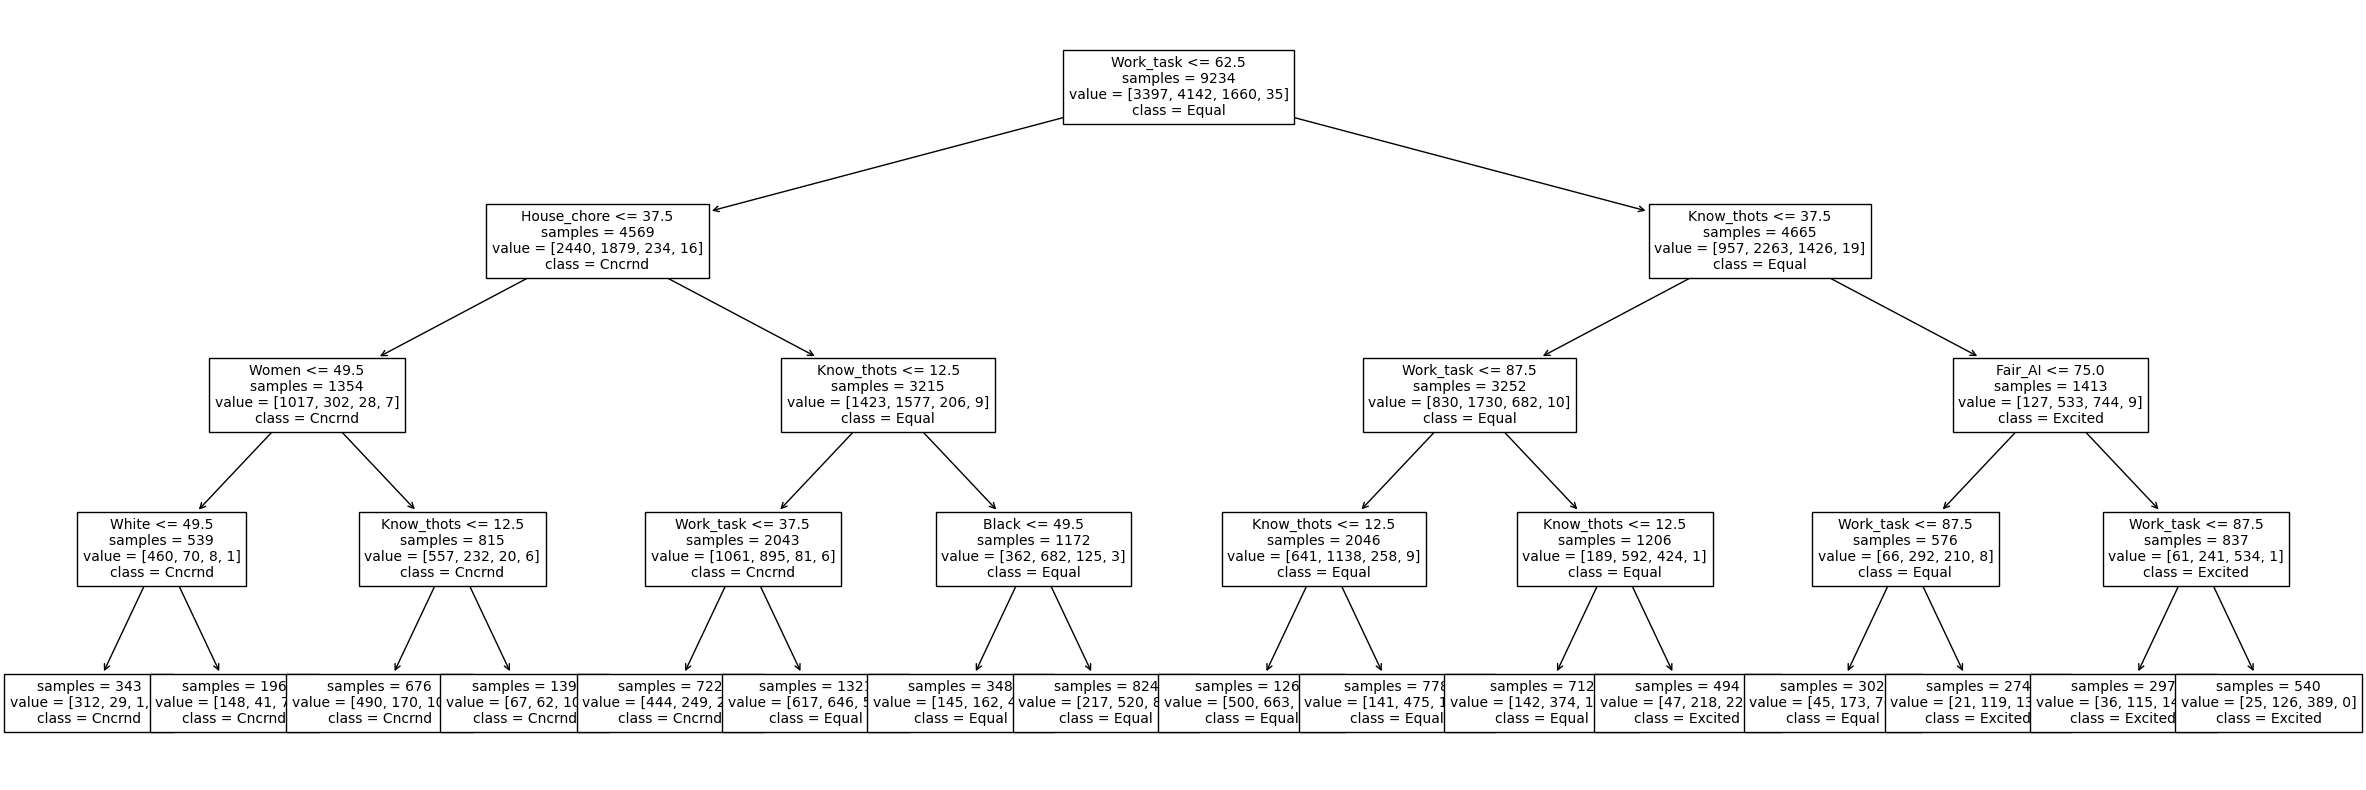

In [11]:
fig = plt.figure(figsize=(30,10))

tree.plot_tree(tree_clf,
    feature_names = list(features),
    class_names = list(labels),
    impurity=False,
    proportion=False,
    filled=False,
    fontsize=10) # adjusted from journal default for this specific plot

plt.show()

**Additional Tree Properties**

In [12]:
# Create a DataFrame with the features and their importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': tree_clf.feature_importances_
})

# Sort the DataFrame by the importances in descending order
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the DataFrame
print(feature_importances_df, "\n")

# Print the number of samples at each node
print("Number of samples at each node:", tree_clf.tree_.n_node_samples, "\n")

# Print the depth of the tree
print("Depth of the tree:", tree_clf.tree_.max_depth)

         Feature  Importance
11     Work_task    0.509880
7     Know_thots    0.256747
8    House_chore    0.157586
0        Fair_AI    0.041714
6          Women    0.016864
2          Black    0.012254
1          White    0.004955
3         Hispnc    0.000000
4          Asian    0.000000
5            Men    0.000000
9   Life_decider    0.000000
10      Med_diag    0.000000
12     Serv_call    0.000000 

Number of samples at each node: [9234 4569 1354  539  343  196  815  676  139 3215 2043  722 1321 1172
  348  824 4665 3252 2046 1268  778 1206  712  494 1413  576  302  274
  837  297  540] 

Depth of the tree: 4


## Predictions


**Acceptance Prediction from Decision Tree**  
Hypothetical survey answers can be entered to predict the outcome per the trained decision tree model.

In [13]:
# Predicition for how a survey participant would answer:
#   "Overall, would you say the increased use of artificial intelligence computer programs in daily life makes you feel…"
#   "Excited," "Concerned," or "Equally excited and concerned."

# Do you think it is possible or not possible for people to design artificial intelligence computer programs that can 
# consistently make fair decisions in complex situations?

Fair_AI = 100 
    
# Thinking about the people who design artificial intelligence computer programs, 
# how well do you think they take into account the experiences and views of each of the following?

White = 100
Black = 100
Hispnc = 100 
Asian = 100 
Men = 100 
Women = 100 

# How excited or concerned would you be if artificial intelligence computer programs could do each of the following?

Know_thots = 100 # Know people’s thoughts and behaviors
House_chore = 100 # Perform household chores
Life_decider = 100 # Make important life decisions for people
Med_diag = 100 # Diagnose medical problems
Work_task = 100 # Perform repetitive workplace tasks
Serv_call = 100 # Handle customer service calls

print('This person would say that the increased use of artifical intelligence in daily life makes them feel:')
tree_clf.predict([[Fair_AI, White, Black, Hispnc, Asian, Men, Women, Know_thots, House_chore, Life_decider, Med_diag, Work_task, Serv_call]])[0]

This person would say that the increased use of artifical intelligence in daily life makes them feel:


'Excited'

**Acceptance Prediction from Decision Tree, Top 4 Tier Variables**  
Specific hypothetical survey answers can be entered to predict the outcome per the trained decision tree with the remaining answers chosen semi-randomly from their distribution in the survey. Reorganized for focus on the variables indicated as high importance by this decision tree model.

In [14]:
# Independant Variables by Importance
Work_task = 100 #np.random.choice(df['Work_task'].values)
Know_thots = np.random.choice(df['Know_thots'].values)
House_chore = np.random.choice(df['House_chore'].values)
Fair_AI = np.random.choice(df['Fair_AI'].values)
Women = np.random.choice(df['Women'].values)
Black = np.random.choice(df['Black'].values)

# No influence, semi-random assignment based on distribution of column values
White = np.random.choice(df['White'].values)
Hispnc = np.random.choice(df['Hispnc'].values)
Asian = np.random.choice(df['Asian'].values)
Men = np.random.choice(df['Men'].values)
Life_decider = np.random.choice(df['Life_decider'].values)
Med_diag = np.random.choice(df['Med_diag'].values)
Serv_call = np.random.choice(df['Serv_call'].values)

print('This person would say that the increased use of artifical intelligence in daily life makes them feel:')
tree_clf.predict([[Fair_AI, White, Black, Hispnc, Asian, Men, Women, Know_thots, House_chore, Life_decider, Med_diag, Work_task, Serv_call]])[0]

This person would say that the increased use of artifical intelligence in daily life makes them feel:


'Equal'

## Predictive Accuracy

**Accuracy on Test Data**  
Find model accuracy by applying the trained decision tree algorithm to the 10% of the original survery data that was held aside during data preprocessing for later testing.

In [15]:
# Predict on the test data
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, zero_division=0)
print(report)


Accuracy: 0.59
              precision    recall  f1-score   support

      Cncrnd       0.68      0.44      0.53       376
       Equal       0.54      0.74      0.63       455
     Excited       0.61      0.52      0.56       193
          NA       0.00      0.00      0.00         2

    accuracy                           0.59      1026
   macro avg       0.46      0.43      0.43      1026
weighted avg       0.60      0.59      0.58      1026



**Cross-validation on Training Data**  
The scikit-learn cross-validation tool can be used to automate the generation of test data subsets and check them against the trained decision tree model.

In [16]:
# Perform cross-validation
scores = cross_val_score(tree_clf, X, y, cv=5)  # cv is the (adjustable) number of folds

# Print the accuracy for each fold
print("Accuracy for each fold: ", scores)

# Print the mean accuracy and standard deviation
print("Mean accuracy: ", scores.mean())
print("Standard deviation: ", scores.std())

Accuracy for each fold:  [0.60087719 0.56091618 0.56725146 0.56676413 0.57894737]
Mean accuracy:  0.5749512670565302
Standard deviation:  0.014222674277210886


## Conclusions

**Notable Observations from Results**

The most important considerations to survey participants appear to be:   
1. How excited or concerned would you be if artificial intelligence computer programs could: Perform repetitive workplace tasks? 
1. How excited or concerned would you be if artificial intelligence computer programs could: Know people’s thoughts and behaviors?
1. How excited or concerned would you be if artificial intelligence computer programs could: Perform household chores?
1. Do you think it is possible or not possible for people to design artificial intelligence computer programs that can consistently make fair decisions in complex situations?
1. Thinking about the people who design artificial intelligence computer programs, how well do you think they take into account the experiences and views of: Women, Black adults, and White adults?

Possible trends in the relationship between these features did manifest in the generated decision tree. However, both testing on sample data and cross-validation revealed the accuracy of predictions to be about 60%.

**Tentative Conclusions Drawn from the Decision Tree Relationships**

- Those who are excited about AI tech assuming work tasks are somewhat divided over AI that predicts thoughts and behaviors.  
  - If they are excited or equal about thought and behavior prediction, they are likely to be excited about AI in general, especially if they think AI will be able to handle complicated decisions fairly.  
- Those excited or equal about thought and behavior prediction are likely to be equal in general if they aren't sure AI can handle complicated decisions fairly, unless they are very excited about the prospect of AI doing work tasks enough to be excited overall.  
  - If they are concerned about the prediction of thoughts and behaviors, they are most likely equally concerned and excited about AI technology in general.  
  - Those concerned about the prediction of thoughts and behaviors may still be excited about AI technology in general if they are very excited about the prospect of AI doing work tasks, unless they are some of the most concerned about the predictions of thoughts and behaviors.  
- Those who are concerned or equal about the prospect of AI tech assuming work tasks and house chores are also more concerned about AI-driven discrimination.  
  - If they are more concerned about AI tech for house chores are also more likely to be concerned about discrimination against women.  
  - Those equal or excited about AI tech for house chores are more likely to be concerned about discrimination against black adults if they are also very concerned about AI that predicts people's thoughts and behaviors.  

The accuracy testing of this model implies that these findings, though they seem to largely make sense analytically, are very tentative and indicate areas for further investigation at best.

## Future Development

**Consider Additional Available Data**  

This study only examined the most applicable 14 columns of data out of 72 available for purposes of keeping the intial scope coarse-grained enough to observe major patterns. The data is all linked to an identifier for each of the 10,260 participants, so moving to a finer grain to search for hidden coplexity could reveal some of the inner workings of the trends noted so far. Available additions include:  
- Participant acceptance of other advanced technologies
  - Social media, facial recognition, self-driving cars, brain chip interfaces, gene therapy, and AI-driven exoskeletons  
- Participant individual demographics  
- Participant political and religious opinions  

**Apply Other Models**  

Many other models are available through scikit-learn, so further development from this point would be straightforward. The following are some examples of how the many ML functions of the kit might reveal more insight into the survey data's complex relationships, assuming continuation as a classification task.

- Random Forest (*RandomForestClassifier* for classification or *RandomForestRegressor* for regression)  
  - An ensemble of decision trees, typically trained with the "bagging" method.
  - Reduces overfitting compared to a single decision tree by averaging multiple trees.
  - Each tree is built on a different sample of the data, and the best split at each node is found from a random subset of features.
- Extra Trees (Extremely Randomized Trees, *ExtraTreesClassifier* or *ExtraTreesRegressor*)
  - Like random forests, but trees are built from the entire dataset and splits are chosen more randomly.
  - Reduces variance even more than random forests at the cost of a slight increase in bias.
- Gradient Boosting Trees (*GradientBoostingClassifier* or *GradientBoostingRegressor*)
  - Builds trees one at a time, where each new tree helps to correct errors made by previously trained trees.
  - Typically has better predictive accuracy than a random forest.
  - Utilizes gradient descent to minimize the loss when adding new models.
- k-Nearest Neighbors (*KNeighborsClassifier*): A non-parametric method that is simple and effective, especially if the data has meaningful, interpretable features.
- Neural Networks (*MLPClassifier*): Multi-layer perceptrons (a basic form of neural networks) can model complex non-linear relationships. Requires more data and computational power, but still worth consideration.
- Ensemble Methods (*VotingClassifier*, *StackingClassifier*): Combine the predictions of several base estimators to improve generalizability and robustness over a single estimator.

Full descriptions and further possibilities can be found at: https://scikit-learn.org/stable/user_guide.html


**Adaptation Over Time**  

Pew Research Center asks sets of core questions to study groups over time, which may be the motivation for the 14 questions selected for this project since they were asked of all participants following a similar formula. The complex relationships between these attitudes would become much clearer with seeing how they adapt together over time, and this project could serve as a valuable starting point for understanding how to best approach that analysis once the data is available.
